# Deep Hedging

## Introduction

### Motivation
Accurate pricing and hedging derivative portfolios are crucial for managing pricing risk within the financial securities sector. Although the theoretical frameworks provided by mathematical finance, particularly within the paradigms of idealized, frictionless, and "complete market" models, furnish us with clear-cut solutions for risk-neutral pricing and hedging, these models starkly contrast with the complexities and imperfections of real-world financial markets.


### Issue
In practice, trading any financial instrument involves challenges, including transaction costs, permanent market impacts, and liquidity constraints. The continued dependence on "complete market" models is mainly due to the absence of efficient and scalable alternatives capable of addressing these real-world complexities.

### Solution: Deep Hedging!!!

Deep hedging represents a novel approach by leveraging neural networks to model trading decisions within hedging strategies, marking a significant departure from traditional methods. This model stands out by offering a dynamic and scalable solution tailored to the complexities and imperfections inherent in financial markets.



**Key Advantages**
- Efficient Optimization: Enables the streamlined training of hedging strategies, optimizing performance with precision.
- Model Independence: Operates free from the constraints of traditional financial models, providing flexibility in facing the unpredictable nature of markets.

## Discrete Time Market with Frictions

### Setting

Given
* a discrete-time financial market with finite time horizon $ T $ and trading dates $ 0 = t_{0} < t_{1} < . . . < t_{n} = T $

* a finite probability space $ \Omega = \{\omega_{1}, . . . , \omega_{N} \} $ and a probability measure $ \mathbb{P} $ such that $ \mathbb{P}[{\omega_{\ i}}] > 0 $ for all $ i $.

* $I_{k} \in \mathbb{R}^{r}$ the market information available at time $ t_{k} $, which represents all known information such as prices, bid, asks, etc.

* the filtration $\mathbb{F} = (F_{k})_{k = 0,...,n }$ generated by $ I = (I_{k})_{k = 0,...,n } $.

* $d$ stocks with mid-prices given by an $ \mathbb{R}^{d} $-valued $ \mathbb{F} $-adapted stochastic process $S = (S_{k})_{k = 0,...,n } $.

* a random variable $Z$, which represents a contingent claim with maturity $T$, is measurable with respect to $ \mathbb{F}_{T} $.


#### Remark

* We do not require that there is an equivalent martingale measure under which $ S $ is a martingale.

* In practice, $Z$ could be a portfolio of derivatives, which is a mix of liquid and OTC derivatives with maximum maturity $T$.

### Trading strategies

To hedge a contingent claim $Z$ at $T$, we engage in trading $S$ through an $\mathbb{R}^{d}$-valued $\mathbb{F}$-adapted stochastic process $\delta = (\delta_{k})_{k = 0,...,n-1}$, where $\delta_{k} = (\delta^{1}_{k}, \dots, \delta^{d}_{k})$. Here, $\delta^{i}_{k}$ represents the agent's holdings of the agent's holdings of the $i$th asset at time $ t_{k}$. We also define $\delta_{-1} = \delta_{n} := 0 $ for notational convenience.


We define the following trading spaces:
- $H^{u}$ is defined as the unconstrained set of trading strategies

- $H_{k}$ denotes the set of trading strategies for $\delta_k$ that are constrained by specific criteria. It is given by the image of a continuous, $\mathbb{F}_{k} $-measurable map $H_{k} : \mathbb{R}^{d(k+1)} \rightarrow \mathbb{R}^{d}$.

- $H := (H \circ H^u) \subset H^u$ represents the set of restricted trading strategies. The operation $(H \circ \delta^{u})_{k} := H_{k}((H \circ \delta^{u})_{0}, \dots ,(H \circ \delta^{u})_{k-1}, \delta^{u}_{k})$ projects $\delta^{u} \in H^{u}$ into the constrained space $H_k$.

### Hedging

Consider a portfolio where $p_0$ denotes the initial cash position. A negative cash injection suggests the possibility of withdrawing cash from the portfolio.

We assume that all trading activities are self-financing. This means we use the portfolio's own assets for funding or operations without external borrowing or investments.

In an ideal market free of transaction costs, the portfolio's wealth at time $T$ can be expressed as $-Z + p_{0} + (\delta \cdot S)_{T}$, where

$$
(\delta \cdot S)_{T} := \sum^{T-1}_{k = 0} \delta_{k}(S_{k+1} - S_{k}).
$$

In [1]:
import numpy as np
def captial_gain (delta, S, T):
    rev = 0
    for i in range(T-1):
        rev += np.matmul(delta[i], (S[i+1] - S[i]))
    return rev

### Transaction cost

In practice, trading cost cannot be neglected.

We assume that any trading activity causes proportional transaction costs. Specifically, if an agent buys a position $n \in \mathbb{R}^{d}$ in asset $S$ at time $t_{k}$, the associated cost is calculated as
$$
c_{k}(n) := \sum^{d}_{i = 1} c^{i}_{k} S^{i}_{k}|n_{i}|.
$$

Thus, the cumulative cost of implementing a trading strategy $\delta$ until the maturity is

$$
C_{T} (\delta) := \sum^{n}_{k = 0} c_{k}(\delta_{k} - \delta_{k-1}).
$$

Consequently, the terminal portfolio value at $T$ is given by

$$
\text{PL}_{T}(Z, p_{0}, \delta) := -Z + p_{0} + (\delta \cdot S)_{T} - C_{T}(\delta).
$$


In [2]:
def transaction_cost( n, cost, S, k):
    cost_value = 0
    for i in range(S.shape[1]):
        cost_value += cost[k][i] * S[k][i] * np.abs(n)[i]
    return cost_value


def cumulative_cost(cost, delta, S, T):
    rev = 0
    for k in range(1, T-1):
        rev += transaction_cost( delta[k] - delta[k-1], cost, S, k)
    return rev


#### Remark

Typically, $c_{k}$ represents a non-negative, upper semi-continuous function that accommodates for market impact.

## Pricing and hedging using convex risk measure

### Convex risk measure

Assume that $X$, $X_{1}$, $X_{2} \in \mathfrak{X}$ represent asset positions.

We call $ \rho : \mathfrak{X} \rightarrow \mathbb{R} $ a convex risk measure if it is

1.  **Monotone decreasing**: if $X_{1} \geq X_{2}$ then $\rho(X_{1}) \leq \rho(X_{2})$. \\
This implies that a more favorable asset position necessitates a lower cash injection to mitigate risk.

2.  **Convex**: $\rho (\alpha X_{1} + (1 - \alpha)X_{2}) \leq \alpha \rho(X_{1}) + (1 - \alpha) \rho(X_{2})$ for $\alpha \in [0, 1]$. \\
This property underlines the principle that diversification can reduce risk.

3. **Cash-Invariant**: $\rho(X + c) = \rho(X) - c$ for $c \in \mathbb{R}$. \\
This means that adding cash to a position reduces the need for more by as much. Specifically, $\rho(X + \rho(X)) = 0$, i.e. $\rho(X)$ is the least amount $c$ that needs to be added to the position $ X $ in order to make it acceptable in the sense that $\rho(X + c) \leq 0$.

We call $\rho$ normalized if $\rho(0) = 0$.

Below are some examples of convex risk measure.

#### CVaR risk measure


$$
CVaR(X) := \mathbb{E} [X|X \leq VaR(X)]
$$
where $VaR(X) := P[X \leq \cdot ]^{-1}(1-\alpha)$

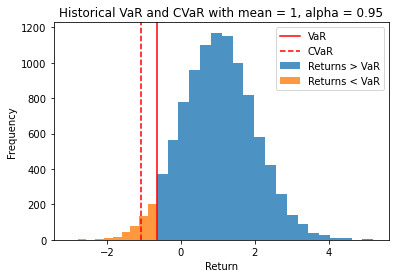

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def funtion_l( x, alpha):
    return np.max(0,x)/(1 - alpha)
def VaR(x, alpha):
    x_sorted = np.sort(x)
    tail_index = int((1 - alpha) * len(x))
    return x_sorted[tail_index]

def CVaR(x, alpha):
    CVaR_value = np.mean(x[x < VaR(x, alpha)])
    return CVaR_value

alpha = 0.95
returns = np.random.normal(loc = 1, scale = 1.0, size=10000)
VaR_return = VaR(returns, alpha)
CVaR_return = CVaR(returns, alpha)

plt.hist(returns[returns > VaR_return], bins = 20, label='Returns > VaR', alpha = 0.8)
plt.hist(returns[returns < VaR_return], bins = 10, label='Returns < VaR', alpha = 0.8)
plt.axvline(VaR_return, color = 'red', linestyle = 'solid', label = 'VaR')
plt.axvline(CVaR_return, color = 'red', linestyle = 'dashed', label = 'CVaR')
plt.legend(loc = 'upper right')
plt.title('Historical VaR and CVaR with mean = 1, alpha = 0.95')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

#### Entropic risk measure

$$
\rho = \frac{1}{\lambda} \log \left( \mathbb{E}\left[ \exp(-\lambda X) \right] \right)
$$

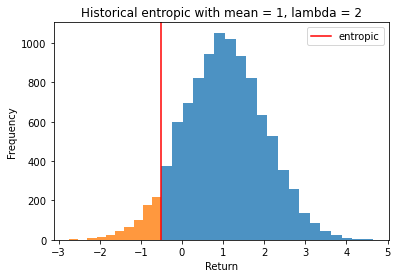

In [4]:
def entropic(X, lambda_val):
    return np.log(np.mean(np.exp(- lambda_val * X)))/lambda_val

lambda_val = 1
returns = np.random.normal(loc = 1, scale = 1.0, size=10000)
entropic_val = entropic(returns, lambda_val)

plt.hist(returns[returns > entropic_val], bins = 20, alpha = 0.8)
plt.hist(returns[returns < entropic_val], bins = 10, alpha = 0.8)
plt.axvline(entropic_val, color = 'red', linestyle = 'solid', label = 'entropic')
plt.legend(loc = 'upper right')
plt.title('Historical entropic with mean = 1, lambda = 2')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

### Optimal hedging strategy

Consider the optimization problem

$$
\pi(X) := \inf_{\delta \in H} \rho(X + (\delta \cdot S)_{T} - C_{T} (\delta)). \qquad (*)
$$

**Proposition**
$\pi$ is monotone decreasing and cash-invariant.
If moreover $C_T$ and $H$ are convex, then $\pi$ is a convex risk measure.

proof:

To show the convexity, let $ \alpha \in [0, 1] $, set $ \alpha':= 1 - \alpha $ and assume $ X_{1}, X_{2} \in \mathfrak{X}$. Then we have

\begin{align*}
\pi(\alpha X_{1} + \alpha' X_{2})
&= \inf_{\delta \in H} \rho(\alpha X_{1} + \alpha' X_{2} + (\delta \cdot S)_{T} - C_{T} (\delta)) \\
&= \inf_{\delta_{1} ,\delta_{2} \in H} \rho(\alpha \{ X_{1} + (\delta_{1} \cdot S)_{T} \} + \alpha' \{ X_{2} + (\delta_{2} \cdot S)_{T} \} - C_{T} (\alpha \delta_{1} + \alpha' \delta_{2})) \\
&\leq \inf_{\delta_{1} ,\delta_{2} \in H} \rho(\alpha \{ X_{1} + ( \delta_{1} \cdot S)_{T} - C_{T}(\delta_{1}) \} + \alpha' \{ X_{2} + (\delta_{2} \cdot S)_{T} - C_{T}(\delta_{2}) \} ) \\
&\leq \inf_{\delta_{1} ,\delta_{2} \in H} \{ \alpha \rho (X_{1} + ( \delta_{1} \cdot S)_{T} - C_{T}(\delta_{1})) + \alpha' \rho ( X_{2} + (\delta_{2} \cdot S)_{T} - C_{T}(\delta_{2}) ) \} \\
&= \alpha \pi (X_{1}) + \alpha' \pi (X_{2}),
\end{align*}


because $ H $ is convex ,then we can decompose $ \delta $ to $ \alpha \delta_{1} + \alpha' \delta_{2} $ , $ C_{T} $ is convex , $ \rho $ is convex

Cash-invariance and monotonicity follow directly from the respective properties of $\rho$.

We define an optimal hedging strategy as $\delta$ that minimizes within $H$ as per the definition of $\pi(X)$.

### Indifference price


Recalling the interpretation of $\rho(-Z)$ as the minimal amount of capital that has to be added to the risky position $-Z$ to make it acceptable for the risk measure $\rho$. Consequently, $\pi(-Z)$ represents the minimum amount the agent needs to charge in order to make her terminal position acceptable, if she hedges optimally.

If we defined $\pi(-Z)$ as the minimal price, then we would exclude the possibility that having no liabilities may actually have positive value. This might be the case in the presence of statistically positive expectation of returns under $\mathbb{P}$ for some of our hedging instruments.

We therefore define the indifference price $p(Z)$ as the amount of cash that she needs to charge in order to be indifferent between the position $-Z$ and not doing so, i.e. as the solution $p_{0}$ to $\pi(-Z + p_{0}) = \pi(0)$. By cash-invariance this is equivalent to taking $p_{0} := p(Z)$, where

$$
p(Z) := \pi(-Z) - \pi(0).
$$

It's important to note that in an ideal scenario devoid of trading restrictions and transaction costs, this indifference price would align with the value of a replicating portfolio (if it exist).



**Lemma**

Suppose $C_{T} \equiv 0$ and $H = H^{u}$. If $Z$ is attainable, i.e. there exists $ \delta^{*} \in H $ and $ p_{0} \in \mathbb{R} $ such that $Z = p_{0} + (\delta^{*} \cdot S)_{T}$, then $p(Z) = p_{0}$.

Proof:
For any $\delta \in H$, the assumptions and cash-invariance of $\rho$ imply

$$
\rho(-Z + (\delta \cdot S)_{T} - C_{T} (\delta)) = \rho( (\delta \cdot S)_{T} ) + p_{0} + (\delta^{*} \cdot S)_{T} = p_0 + \rho (([\delta - \delta^{*}] \cdot S)_{T} ).
$$

Taking the infimum over $\delta \circ H$ on both sides and using $H - \delta^{*} = H$ one obtains

$$
\pi(-Z) = p_{0} + \inf_{\delta \in H} \rho (([\delta - \delta^{*}] \cdot S)_{T} ) = p_{0} + \pi(0).
$$

#### Exponential utility indifference pricing

Consider the exponential utility function $U(x) := -\exp(-\lambda x)$, where $x \in \mathbb{R}$ and $\lambda > 0$ is the risk-aversion parameter

Then the indifference price $q(Z) \in \mathbb{R}$ of an asset or liability $Z$ is defined through the equation

$$
\sup_{\delta \in H} \ \mathbb{E} [U(q(Z) - Z + (\delta \cdot S)_{T} + C_{T} (\delta))] = \sup_{\delta \in H} \ \mathbb{E} [U \left((\delta \cdot S)_T + C_T (\delta) \right)].
$$

In other words, if the seller charges a cash amount of $q(Z)$, sells $Z$ and trades in the market, she obtains the same expected utility as by not not selling $Z$ at all.

Essentially, the indifference price $q(Z)$ is the price at which the seller is indifferent between selling $Z$ and retaining it, given the utility derived from other market activities.

**Lemma**
Choose $\rho$ as the entropic risk measure. Then $q(Z) = p(Z)$.

proof:


$ p(Z) = \pi (-Z) - \pi (0) $ and recall that

$$
\pi(X) := \inf_{\delta \in H} \rho(X + (\delta \cdot S)_{T} - C_{T} (\delta))
$$

so we get

$$
p(Z) = \pi (-Z) - \pi(0) = \inf_{\delta \in H} \rho(-Z + (\delta \cdot S)_{T} - C_{T} (\delta)) - \inf_{\delta \in H} \rho((\delta \cdot S)_{T} - C_{T} (\delta))
$$

choose $ \rho $ as the entropic risk measure

$$
\rho (X) = \frac{1}{\lambda}log \ \mathbb{E}[exp(-\lambda X)]
$$

then we rewrite the $p(Z)$

$$
p(Z) = \inf_{\delta \in H} \frac{1}{\lambda}log \ \mathbb{E}[exp(-\lambda (-Z + (\delta \cdot S)_{T} - C_{T} (\delta)))] - \inf_{\delta \in H} \frac{1}{\lambda}log \ \mathbb{E}[exp(-\lambda ((\delta \cdot S)_{T} - C_{T} (\delta)))]
$$

because $U(x) := -\exp(-\lambda x)$ so we get

$$
p(Z) = \frac{1}{\lambda} log (\frac{\sup_{\delta \in H} \mathbb{E} [U(-Z + (\delta \cdot S)_{T} + C_{T}(\delta))]}{\sup_{\delta \in H} \mathbb{E} [U(\delta \cdot S)_{T} + C_{T}]})
$$

and we know that

$$
\sup_{\delta \in H} \ \mathbb{E} [U(q(Z) - Z + (\delta \cdot S)_{T} + C_{T} (\delta))] = \sup_{\delta \in H} \ \mathbb{E} [U \left((\delta \cdot S)_T + C_T (\delta) \right)].
$$

we take out the $U(q(z))$ then

$$
\sup_{\delta \in H} \ \mathbb{E} [U(- Z + (\delta \cdot S)_{T} + C_{T} (\delta))] - U(q(z)) = \sup_{\delta \in H} \ \mathbb{E} [U \left((\delta \cdot S)_T + C_T (\delta) \right)].
$$

(I don't know how to get q(Z))

$$
q(Z) = \frac{1}{\lambda} log (\frac{\sup_{\delta \in H} \mathbb{E} [U(-Z + (\delta \cdot S)_{T} + C_{T}(\delta))]}{\sup_{\delta \in H} \mathbb{E} [U(\delta \cdot S)_{T} + C_{T}]})
$$

### Optimized certainty equivalents

Assume that $ \ell : \mathbb{R} \to \mathbb{R} $ is a loss
function, i.e. continuous, non-decreasing and convex. We may define a convex risk measure $ \rho $ by setting

$$
\rho(X) := \inf_{w \in \mathbb{R}} \left\{ w + \mathbb{E} [\ell (-X -w)] \right\} , \quad X \in \mathfrak{X} .
$$

**Lemma**
$\rho(X)$ defines a convex risk measure.

Proof :
Let $ X, Y \in \mathfrak{X} $ be assets.

1.  Monotonicity: suppose $ X \leq Y $ . Since $ \ell $ is non-decreasing, for any $ w \in \mathbb{R} $ one has $\mathbb{E}[\ell (-X - w)] \geq E[ \ell(-Y - w)] $ and thus $ \rho(X) \geq \rho(Y)$.

2.  Cash invariance: for any $m \in \mathbb{R}$, we have
$$
\rho(X + m) = \inf_{w \in R} \{(w + m) - m + \mathbb{E}[\ell(-X - (w + m))] \} = -m + \rho(X)
$$
by the definition.

3. Convexity: let $\lambda \in [0, 1]$. Then convexity of $\ell$ implies
\begin{align}
\rho (\lambda X+(1 - \lambda)Y ) &= \inf_{w \in \mathbb{R}}\{w + \mathbb{E}[\ell(-\lambda X - (1 - \lambda)Y - w)]\} \\
&= \inf_{w_{1},w_{2} \in \mathbb{R}}\{\lambda w_{1} + (1 - \lambda)w_{2} + \mathbb{E}[\ell(\lambda(-X - w_{1}) + (1 - \lambda)(-Y - w_{2}))]\} \\
&\leq \inf_{w_{1} \in \mathbb{R}} \inf_{w_{2} \in \mathbb{R}} \{\lambda(w_{1} + \mathbb{E}[\ell(-X - w_{1})]) + (1 - \lambda)(w_{2} + \mathbb{E}[\ell(-Y - w_{2})])\} \\
&= \lambda \rho(X) + (1 - \lambda)\rho(Y)
\end{align}

#### Entropic risk measure from optimization problem



$$
\rho(X) = \frac{1}{\lambda} \log \left( \mathbb{E}\left[ \exp(-\lambda X) \right] \right)
$$

With fixed $\lambda > 0$ and set $\ell(x) := \exp(\lambda x) - \frac{1 + \log(\lambda)}{\lambda}$, $x \in \mathbb{R}$. Then the optimization problem in

$$
\rho(X) := \inf_{w \in \mathbb{R}} \{ w + \mathbb{E}[\ell(-X - w)] \}
$$

can be solved explicitly, and the minimizer $w^*$ satisfies $\exp(\lambda w^*) = \lambda \mathbb{E}[\exp(-\lambda X)]$.

Put $\ell$ and minimizer $w^*$ into the optimization problem, and we obtain the entropic risk measure defined above.

\begin{align*}
\rho(X) &= \inf_{w \in \mathbb{R}} \{ w + \mathbb{E}[\ell(-X - w)] \} \\
        &= \inf_{w \in \mathbb{R}} \{ w + \mathbb{E}[exp(-\lambda X - \lambda w) - \frac{1 + log(\lambda)}{\lambda}] \} \\
        &=  \frac{log(\lambda)}{\lambda} +  \frac{log\mathbb{E}[(exp(\lambda X))]}{\lambda} + exp(-\lambda w) \mathbb{E}[exp(-\lambda X )] - \frac{1 + log(\lambda)}{\lambda} \\
        &= \frac{1}{\lambda} \log \left( \mathbb{E}\left[ \exp(-\lambda X) \right] \right) \\
\end{align*}

#### CVaR risk measure




Let $\alpha \in (0, 1)$ and set $\ell(x) := \frac{\max(1,0)}{1- \alpha}$. The associated risk measure( Conditional value at risk) is given by:
$$
CVaR(X) := \mathbb{E} [X|X \leq VaR(X)]
$$
where $VaR(X) := P[X \leq \cdot ]^{-1}(1-\alpha)$

## Approximating Hedging Strategies by Deep Neural Networks

### Universal approximation by neural networks

Let's $NN_{\infty, d_0, d_1} := NN^\sigma_{\infty, d_0, d_1}$ be the set of neural networks mapping from $\mathbb{R}^{d_0}$ to $\mathbb{R}^{d_1}$ with activation function $\sigma$.

**Theorem** (Universal Approximation)
Suppose $\sigma $ is bounded and non-constant. Then the following statements hold:
* For any finite measure $\mu$ on $(\mathbb{R}^{d_0},B(\mathbb{R}^{d_0}))$, and $1 \leq p < \infty$, the set $NN^{\sigma}_{\infty,d_0,1}$ is dense in $L^p(\mathbb{R}^{d_0}, \mu)$.
* If in addition $\sigma \in C(\mathbb{R})$, then $NN^{\sigma}_{\infty,d_0,1}$ is dense in $C(\mathbb{R}^{d_0})$ for the topology of uniform convergence on compact sets.

We denote by $\{NN^{\sigma}_{M,d_0,d_1}\}_{M \in \mathbb{N}}$ a sequence of subsets of $NN^{\sigma}_{\infty,d_0,d_1}$ with the following properties:

* $NN^{\sigma}_{M,d_0,d_1} \subset NN^{\sigma}_{M+1,d_0,d_1}$ for all $M \in \mathbb{N}$.

* $\underset{M \in \mathbb{N}}{\displaystyle \bigcup} NN^{\sigma}_{M,d_0,d_1} = NN^{\sigma}_{\infty,d_0,d_1}$.

* For any $M \in \mathbb{N}$, one has $NN^{\sigma}_{M,d_0,d_1} = \{F_{\theta}: \theta \in \Theta_{M,d_0,d_1}\}$ with $\Theta_{M,d_0,d_1} \subset \mathbb{R}^q$ for some $q \in \mathbb{N}$ (depending on $M$).

In practical applications, we consider two distinct categories of examples:

* $NN_{M,d_0,d_1}$ with an arbitrary number of layers and nodes (at most M non-zero weights) in $NN_{\infty,d_0,d_1}$

* $NN_{M,d_0,d_1}$ the set with a fixed architecture (a fixed number of layers $L^{(M)}$ and fixed input and output dimensions for each layer) in $NN_{\infty,d_0,d_1}$

### Optimal hedging using deep neural networks
We now consider neural network hedging strategies.

In order to apply the Universal Approximation Theorem above, we represent the optimization over constrained trading strategies $\delta \in H$ as an optimization over $\delta \in H^u$ with a following modified objective.

**Lemma**
We may write the constrained problem (*) as the modified un-constrained problem as

$$
\pi(X) = \inf_{\delta \in H^u} \rho\left(X + (H \circ \delta \cdot S)_T - C_T (H \circ \delta)\right).
$$

Recall that the information available in our market at $t_k$ is described by the observed maximal feature set $I_0, \ldots, I_k$.

In our numerical approach, we substitute the set $H^u$ with $H_M \subset H^u$, tailoring our trading strategies to rely on this specific information and our previous position in tradable assets. This gives rise to the following semi-recurrent deep neural network architecture for our unconstrained trading strategies.

Define

$$
\begin{align}
H_{M} &= \{(\delta_{k})_{k = 0,...,n-1} \in H^{u} : \delta_{k} = F_{k}(I_{0},...,I_{k},\delta_{k-1}),F_{k} \in NN_{M,r(k+1)+d,d}\} \\
&= \{(\delta_{k}^{\theta})_{k = 0,...,n-1} \in H^{u} : \delta_{k}^{\theta} = F_{k}^{\theta}(I_{0},...,I_{k},\delta_{k-1}),\theta_{k} \in \Theta_{M,r(k+1)+d,d} \}
\end{align}
$$

We now replace the set $H^u$ by $H_M \subset H^u$. The goal is to calculate

\begin{align*}
\pi^M(X)
&= \inf_{\delta \in H_M} \rho\left(X + (H \circ \delta \cdot S)_T - C_T (H \circ \delta)\right) \\
&= \inf_{\theta \in \Theta_M} \rho\left(X + (H \circ \delta^\theta \cdot S)_T - C_T(H \circ \delta \theta)\right) \qquad (**)
\end{align*}
where $\Theta_M = \prod \limits_{k=0}^{n-1} \Theta_{M,r(k+1)+d,d}$.

#### Remark
When $H \circ \delta = \delta $ for $ \delta \in H $ we get

$$
\pi(X) \equiv \inf_{\delta \in H^{u}} \rho (X + H \circ \delta \cdot S_{T} - C_{T} (\delta) - \gamma || \delta - H \circ \delta ||_{1} )
$$

for Lagrange multipliers $\gamma \gg 0$.

**Proposition**
$$
\lim_{M \to \infty} \pi^M(X) = \pi(X).
$$



### Numerical solution for OCE-risk measures

To calculate a (close-to) optimal parameter $\theta \in \Theta_M$, we rewrite the optimization problem as

$$
\pi^M(-Z) = \inf_{\bar{\theta} \in \Theta} \inf_{w \in \mathbb{R}}
\left \{ w + E[\ell(Z - (\delta^{\bar{\theta}} \cdot S)_T + C_T (\delta^{\bar{\theta}}) - w)] \right \} = \inf_{\theta \in \Theta} J(\theta)
$$
where $\Theta = \mathbb{R} \times \Theta_M$ and for $\theta = (w,\theta_T) \in \Theta$,

$$
J(\theta) := w + E[\ell(Z - (\delta^{\bar{\theta}} \cdot S)_T + C_T (\delta^{\bar{\theta}}) - w)]. \qquad (***)
$$

To find a local minimum of a differentiable function $J$, the gradient descent algorithm is commonly employed:

* Initiate with a starting point $\theta^{(0)}$. Then iteratively update this point using the rule:
$$
\theta ^{(j+1)} = \theta ^{(j)} - \eta_{j} \nabla J_{j}(\theta^{(j)})
$$
where $\eta_{j} > 0$ is a small step size for iteration $j \in \mathbb{N}$, ensuring that adjustments are made in the direction that reduces $J_j = J$.

* Given certain assumptions on $J$ and the step sizes $\{\eta_j \}_{j \in \mathbb{N}}$, the sequence $\{\theta ^{(j)}\}$ will converges to a local minimum of $J$ as $j \to \infty$.

Critical Issues:
1. How can one ensure to find a global minimum instead of a local one?
2. Can $\nabla J$ be calculated efficiently?

#### Stochastic gradient descent algorithm

The expectation in (***) is traditionally computed through a weighted sum over all elements in the large, yet finite, sample space $\Omega$.

A pivotal breakthrough in deep learning addresses the dual challenges of avoiding local minima and efficient computation of the cost function $J$, which is constructed on neural network foundations. This is achieved through the **minibatch stochastic gradient descent**:

During each iteration $j$, rather than utilizing the entire $\Omega$, a randomly selected subset of size $N_{batch}$, significantly smaller than $N$, is used. Consequently, $J_j$ at this step is defined by:

$$
J_{j}(\theta) = w + \sum^{N_{batch}}_{m = 1} \ell(Z(w^{(j)}_{m})-(\delta^{\bar{\theta}} \cdot S)_{T}(w^{(j)}_{m})+C_{T}(\delta^{\bar{\theta}})(w^{(j)}_{m})-w) \frac{N}{N_{batch}}\mathbb{P}[\{w^{(j)}_{m}\}]
$$

with a selection of $w^{(j)}_{1}, . . . , w^{(j)}_{N_{batch}}$ from $\Omega$. This strategy aims to:

- Significantly enhance the efficiency of computing the gradient, or make it feasible when $N$ is exceedingly large.

- Prevent getting stuck in local minima: The incorporation of randomness within the gradient ensures that if $\theta(j)$ reaches a local minimum at any iteration $j$, it is not permanently confined there but has the potential to move beyond this point in subsequent iterations.

##### Remark
There is no general result guaranteeing convergence to the global minimum in a reasonable amount of time.

To compute the gradient of $J$​ for each term in the summation, the compositional structure of neural networks is used.

Provided that the functions $l$, $c$ and $\sigma$ are sufficiently differentiable, with derivatives accessible in closed form, the chain rule can be employed to determine the gradient of $J_j$. Moreover, these analytical expressions can be efficiently processed through the **backpropagation algorithm**, which will be discussed subsequently.

### Exponential Utility Case

In scenarios involving exponential utility, bypassing the minimization over $w$ allows for the direct application of the entropic risk measure to the formula, leading to:

$$
\pi^M(-Z) = \frac{1}{\lambda} \ln \inf_{\theta \in \Theta_M} J(\theta)
$$

where

$$    
J(\theta) := \mathbb{E} \left[ \exp \left( -\lambda \left( -Z + (\delta^\theta \cdot S)_T - C_T (\delta^\theta) \right) \right) \right].
$$

Numerical methods can then be employed to identify a $\theta$ \in \Theta_M$ that is nearly optimal, based on the criteria set above.

### General Coherent Risk Measures Case

Goal:

- Show that for a general class of convex risk measures (including all coherent ones) one can approximate (*) by a minimax problem over neural networks.

- The objective functional of this approximate problem satisfies

  - (ML1) the gradient of $ J $ decomposes into a sum over the samples,i.e. $ \nabla_{\theta} J(\theta) = \sum^{N}_{m=1} \nabla_{\theta} J(\theta,w_{m})$;

  - (ML2) $ \nabla_{\theta} J(\theta,w_{m}) $ can be calculated efficiently for each $ m $, i.e. using backprogation
  
  making it amenable to deep learning optimization techniques.

#### Robust representation of convex risk measures

Denote by $P$ is the set of probability measures on $ (\Omega,F)$.

**Theorem**
Suppose $ \rho : \mathfrak{X} \to \mathbb{R} $ is a convex risk measure. Then $ \rho $ can be written as

$$
\rho (X) = \max_{\mathbb{Q} \in \mathcal{P}}(\mathbb{E}_{\mathbb{Q}}[-X]-\alpha(\mathbb{Q})), X \in \mathfrak{X} \qquad (****)
$$

where $\alpha(\mathbb{Q}):= \sup_{X \in \mathfrak{X}} (\mathbb{E}_{\mathbb{Q}}[-X] - \rho(X))$.

The function $ \alpha : P \in \mathbb{R} $ is called the (minimal) penalty function of the risk measure $\rho$.

#### Dimension reduction

Given that $\Omega$ is finite, we can equate $P$ with the standard $N-1$ simplex in $\mathbb{R}^{N}$. Consequently, the risk measure $\rho(X) = \max_{\mathbb{Q} \in \mathcal{P}}(\mathbb{E}_{\mathbb{Q}}[-X]-\alpha(\mathbb{Q}))$ translates to an optimization problem within $\mathbb{R}^{N}$.

However, in our context, $N$ is exceedingly large, rendering the direct application of (****) impractical for numerical calculations.

The aim is to demonstrate that $\rho(X)$ can be efficiently approximated through an optimization problem within a more manageable, lower-dimensional space.

Define the set $\mathfrak{L} \subset \mathfrak{X}$ of log-likehoods by

$$
\mathfrak{L} := \{f \in \mathfrak{X} : \mathbb{E}[exp(f)] = 1 \}
$$

define $\bar{\alpha} : \mathfrak{L} \to \mathbb{R}$ by $\bar{\alpha}(f) = \alpha(exp(f) d\mathbb{P})$ for any $f \in \mathfrak{L}$ and write $P_{eq}$ for the set of probability measures on $(\Omega,F)$, which are equivalent to $\mathbb{P}$.

**Theorem**
Suppose \\
- (i) $\alpha(\mathbb{Q}) < \infty $ for some $ \mathbb{Q} \in \mathcal{P}_{eq}$,
- (ii) $\bar{\alpha}$ is continuous,
- (iii) $\mathcal{F} = \mathcal{F}_{T}$.

Then for any $ X \in \mathfrak{X} $, $ \rho(X) = \lim_{M \to \infty} \rho^{M} (X) $, where

$$
\rho^{M} (X) := \sup_{\theta \in \Theta_{M,r(n+1),1} \\ \mathbb{E}[exp(F^{\theta} \cdot \bar{I} )] = 1} (\mathbb{E}[-X \ exp(F^{\theta} \circ \bar{I})] - \bar{\alpha}(F^{\theta} \circ \bar{I})).
$$



An immediate consequence of the theorem is that one may approximate (*) by solving

$$
\inf_{\theta_{0} \in \Theta_{M}} \sup_{\theta_{1} \in \Theta_{M,r(n+1),1}} J(\theta) \qquad (\#)
$$

where $\theta = (\theta_{0},\theta_{1})$,

$$
J(\theta) := \mathbb{E} \left[-PL(Z,0,\delta^{\theta_{0}})exp(F^{\theta_{1}} \circ \bar{I}) \right] - \bar{\alpha}(F^{\theta_{1}} \circ \bar{I}) - \lambda_{0}(\mathbb{E} \left[exp(F^{\theta_{1}} \circ \bar{I}) \right]-1)
$$

and $\lambda_{0}$ is a Lagrange multiplier.

**Proposition**
The objective $J$ in (\#) satisfies (ML1) and (ML2).



## Numerical Experiments


### Setup


#### Import Libraries


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as fn
import torch
from torch.distributions.normal import Normal
from torch.nn import Linear
from torch.nn import ReLU
from torch.optim import Adam
from tqdm import tqdm
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Default device:", DEVICE)

def Seed_all(seed = 42):
    np.random.seed(seed)
    torch.manual_seed (seed)
    torch.cuda.manual_seed (seed)
    torch.cuda.manual_seed_all (seed)


Default device: cpu


In [6]:
def none_payoff(prices: torch.Tensor, strike=100) -> torch.Tensor:
    return torch.full_like((prices[-1, :] - strike), 0)
def european_option_payoff(prices: torch.Tensor, strike=100):
    return fn.relu(prices[-1, :] - strike)

#### Parameters settings


* Trading days $T = 30 $
* Trading dates $t_i = i , \;\;i = 0, 1, \ldots , T $
* $S_t$ is the stock price at time $t$
* $V_t$ is the volatility at time $t$
* $M$ is time to maturaty
* $\delta_t$ is our position at time t
* $F^\theta$ is neural network with parameters $\theta$
* num_paths is number of paths for simulation, num_paths = 1000

#### Compute profit and loss

In [7]:
def compute_profit_and_loss(
    hedging_model: torch.nn.Module,
    isBS, # bs or heston string
    T ,
    dt,
    sigma,
    paths,
    cost,
    payoff
) -> torch.Tensor:

    Paths = paths
    # Change here to connect signature GAN

    hedge = torch.zeros_like(Paths[:1]).reshape(-1)
    vol_model = torch.zeros_like(Paths[:1]).reshape(-1)
    pnl = 0

    for n in range(Paths.shape[0] - 1):
        log_S = (Paths[n, :, None] / s0).log()
        M = torch.full_like(log_S, T - n * dt)
        
        # Model's inputs
        if isBS:
            x_sigma = torch.full_like(log_S, sigma)
            x = torch.cat([log_S, M, x_sigma], 1)
            prev_hedge = hedge    
            hedge = hedging_model(x, prev_hedge)
            
        else :
            x = torch.cat([log_S, M], 1)
            prev_hedge  = hedge , vol_model
            hedge, vol_model  = hedging_model(x, prev_hedge)
            

        pnl += hedge * (Paths[n + 1] - Paths[n])

        # Transaction cost
        if isBS:
            pnl -= cost * torch.abs(hedge - prev_hedge) * Paths[n]
        else :
            pnl -= cost * torch.abs(hedge - prev_hedge[0]) * Paths[n]
    # Pay to customers
    pnl -= payoff(Paths)

    return pnl

#### Training

In [8]:
def Train( hedging_model: torch.nn.Module,isBS, n_epochs, paths, cost, payoff):
  optim = Adam(hedging_model.parameters())

  loss_history = []
  progress = tqdm(range(n_epochs))

  for _ in progress:
    optim.zero_grad()
    pnl = compute_profit_and_loss(hedging_model,isBS, T, dt, sigma, paths, cost, payoff)
    loss = CVaR_loss(pnl,0.95)
    # loss = torch.mean( torch.exp(-pnl/100))
    loss.backward()
    optim.step()

    progress.desc = f"Loss={loss:.5f}"
    loss_history.append(loss.item())

  return loss_history

### Market generators

#### Black-Scholes model


**Black-Scholes model** is specified by the stochastic differential equations:

$$
d S_t = S_t \times (\mu d t + \sigma d W_t ), \; \; for \; t > 0 \;and \;S_0 = s_0 \\
$$

By $it\hat{o}$ lemma, we can get $S_t$ at any t from the function:
$$
S_t = S_0 exp((\mu - \frac{1}{2}\sigma^2)t + \sigma \sqrt{t}Z)
$$

where:
* $S_t$ is the stock price at time t
* $S_0$ is initial price
* $d S$ is the change in stock price
* $\mu$ is the expected return
* $\sigma$  is the variance
* $W$ is one-dimentional brownian motion
* $ Z\sim \mathcal{N}(0,1)$


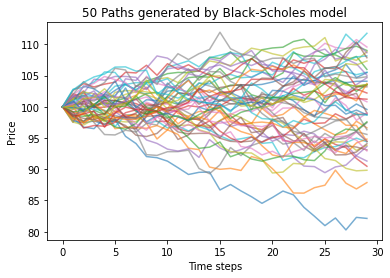

In [52]:
# Generate sample paths
def black_scholes(S0, mu, sigma , T , dt , num_paths):
    randn = torch.randn( (int(T / dt), num_paths), device= DEVICE)
    randn[0, :] = 0.0
    bm = sigma * (dt ** 0.5) * randn.cumsum(0)
    t = torch.linspace(0, T, int(T / dt))[:, None].to(bm)

    return torch.exp( (mu - sigma ** 2) * t / 2 + bm) * S0

Seed_all()
num_paths = 5000
T = 30/252
dt = 1/252
mu = 0
s0 = 100
sigma = 0.2

BSpaths = black_scholes(S0 = s0, mu = mu, sigma = sigma,
                      T = T,dt = dt, num_paths = num_paths)
BS_returns = (BSpaths[-1] - BSpaths[0]).cpu().detach().numpy()

plt.plot(BSpaths.cpu().detach().numpy()[:,:50], alpha = 0.6)
plt.title(f'{50} Paths generated by Black-Scholes model')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.show()


#### Heston model


**Heston model** is specified by the stochastic differential equations:

$$
d S_t = S_t \times (\mu dt + \sqrt{V_t}  dB_t ), \; \; for \; t > 0 \;and \;S_0 = s_0 \\
dV_t = \alpha(b-V_t)dt + \sigma \sqrt{V_t}dW_t, \; \; for \; t > 0 \; and \; V_0 = v_0
$$

where:
* $B$ and $W$ are one-dimentional Brownian motions with correlation $\rho \in [-1,1]$
* $S_t$ is the price of a liquidly tradeable asset at time $t$
* $\mu$ is the expected return
* $V_t$ is variance process of S at time $t$

$\alpha, b, \sigma, v_0, s_0$ are positive constants. And we set those value as below
* $s_0 = $ 1
* $v_0 = $ 0.04
* $\alpha = $ 1
* $b = $ 0.04
* $\rho = $ -0.7
* $\sigma = $ 0.2




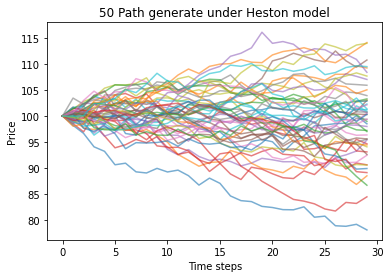

In [53]:
# Generate sample paths
import numpy as np
import matplotlib.pyplot as plt

def generate_heston_paths(s_0, v_0, alpha, b, rho, sigma,  mu, dt, T, num_paths, return_vol=False):

    steps = int(T / dt)
    prices = torch.zeros(( steps, num_paths), device= DEVICE)
    vols = torch.zeros(( steps, num_paths), device= DEVICE)
    S_t = s_0
    V_t = v_0

    prices[0, :] = S_t
    vols[0, :] = V_t
    for t in range(1,steps):
        WT = np.random.multivariate_normal(np.array([0,0]),
                                           cov = np.array([[1,rho],
                                                          [rho,1]]),
                                           size = num_paths) * np.sqrt(dt)

        S_t = S_t * (1 + mu * dt + V_t ** 0.5 * torch.from_numpy(WT[:,0])  )
        V_t = torch.abs(V_t + alpha * (b - V_t) * dt + sigma * (V_t ** 0.5) * torch.from_numpy(WT[:,1]))

        prices[t, :] = S_t
        vols[t, :] = V_t

    if return_vol:
        return prices, vols

    return prices

Seed_all()
# Model parameters
s_0 = 100
v_0 =  0.04
alpha = 1
b = 0.04
rho = -0.7
sigma = 0.2
mu = 0
T = 30/252
dt = 1/252
num_paths = 5000

Hestonpaths, Hestonvols = generate_heston_paths(s_0 = s_0, v_0 = v_0, alpha = alpha, b = b, rho = rho, sigma=sigma,
                               mu = mu, dt=dt, T = T, num_paths=num_paths,return_vol=True)

Heston_returns = (Hestonpaths[-1] - Hestonpaths[0]).cpu().detach().numpy()

plt.title(f'{50} Path generate under Heston model')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.plot(Hestonpaths.cpu().detach().numpy()[:,:50], alpha = 0.6)
plt.show()


### Benchmark: No transaction costs


In this part, we have no transaction cost while hedging.

We will first use Black-Scholes model and Heston model to simulate price paths. Under each model, we will compare hedging use model formula and deep hedging.


We choose our risk measure $\rho$ as entropic risk measure and set default $\lambda$ = 1

$$
\rho(X) = \frac{1}{\lambda} \mathbb{E}\left[ \exp\left( - \lambda X \right) \right]
$$

where $\lambda$ means the degree of risk preference

In [11]:
def entropic_loss(pnl, lambda_val = 1, K = s0) -> torch.Tensor:
    return torch.mean( torch.exp(-lambda_val * pnl/K))/lambda_val


In [12]:
def VaR_loss(x, alpha):
    x_sorted, _ = torch.sort(x)
    tail_index = int((1 - alpha) * len(x))
    return x_sorted[tail_index]

def CVaR_loss(x, alpha):
    CVaR_value = -torch.mean(x[x < VaR_loss(x, alpha)])/100
    return CVaR_value


#### Black-Scholes model


##### Black-Scholes hedging formula

The delta of an call option under Black-scholes model is
\begin{align*}
D &= \frac{\partial C}{\partial S_0} = N(d_1)
\end{align*}
where
* $C$ is call option price
* $N(x)$ is the CDF of standard normal distribution
* $d_{1} = \frac{\log\left(\frac{S_0e^{-rt}}{K}\right) }{\sigma \sqrt{t}} + \frac{\sigma \sqrt{t}}{2}$
* K is strike price, K = s0


In [13]:
#Hedging via formula
from torch.distributions.normal import Normal

def european_option_delta(log_moneyness, time_expiry, volatility) :
    s, t, v =  log_moneyness, time_expiry, volatility
    normal = Normal(torch.tensor(0.0), torch.tensor(1.0))
    return normal.cdf((s + (v ** 2 / 2) * t) / (v * torch.sqrt(t)))


In [14]:
def BS_compute_modelhedge_pnl( T, dt, sigma, paths, payoff, cost) :

    Paths = paths

    hedge = torch.zeros_like(Paths[:1]).reshape(-1)
    pnl = 0
    
    x_log_moneyness = torch.full_like(Paths[0, :], s0/s0).log()
    x_sigma = torch.full_like(x_log_moneyness, sigma)
    
    for n in range(Paths.shape[0] - 1):
        x_time_expiry = torch.full_like(x_log_moneyness, T - n * dt)
        prev_hedge = hedge  
        hedge = european_option_delta(x_log_moneyness[:], x_time_expiry[:], x_sigma[:])
        pnl += (hedge) * (Paths[n + 1] - Paths[n])
        
        pnl -= cost * torch.abs(hedge - prev_hedge) * Paths[n]

    pnl -= payoff(Paths)
    return pnl

BSpnl = BS_compute_modelhedge_pnl(T = T, dt = dt,sigma = sigma, paths = BSpaths,  payoff = european_option_payoff, cost = 0).cpu().detach().numpy()

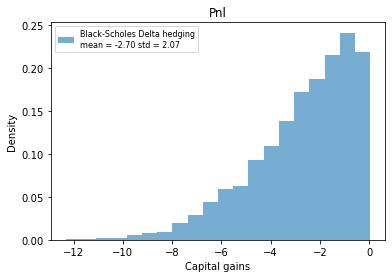

In [58]:

plt.hist(BSpnl, bins = 20, density = True, alpha = 0.6, 
         label = f'Black-Scholes Delta hedging\nmean = {BSpnl.mean():2.2f} std = {BSpnl.std():2.2f}')

plt.title(f"Pnl")
plt.xlabel("Capital gains")
plt.ylabel("Density")
plt.legend(loc = 2, fontsize = 8)
plt.show()

##### Deep Hedging

We use semi-recurrent neural network and set $\delta^\theta_t = F^{\theta_t}(I_t, \delta^\theta_{t-1})$.

BSHedging model
* $I_t = (\log(S_{t}), V_t, M)$ in time $t$
* Number of input nodes : 4
* Number of output nodes : 1
* Hidden layers : 4
* Node of each hidden layer : 32
* Activation function : relu
* Output layer activation function : tanh

In [16]:
#Implement deep hedging algorithm
class MultiLayerPerceptron(torch.nn.ModuleList):
    def __init__(self, in_features, out_features, n_layers=4, n_units=32):
        super().__init__()
        for n in range(n_layers):
            i = in_features if n == 0 else n_units
            self.append(Linear(i, n_units))
            self.append(ReLU())
        self.append(Linear(n_units, out_features))

    def forward(self, x):
        for layer in self:
            x = layer(x)
        return x

class BSHedingModel(torch.nn.Module):
    def __init__(self, in_features=3):
        super().__init__()

        # A four-layer MLP with 32 hidden neurons in each layer
        self.mlp = MultiLayerPerceptron(in_features + 1, 1)

    def forward(self, x, prev):

        x = torch.cat((x, prev.reshape(-1, 1)), 1)
        x = self.mlp(x).reshape(-1)
        x = torch.tanh(x)
        hedge =  x

        return hedge

In [17]:
Seed_all()

BSmodel = BSHedingModel().to(DEVICE)
# history_ffn = Train(BSmodel, True,  1000, BSpaths, cost = 0.0, payoff = european_option_payoff)
# BSDeepHedging_pnl = compute_profit_and_loss(BSmodel, True, T, dt, sigma, BSpaths, cost = 0, payoff =  european_option_payoff).cpu().detach().numpy()


history_ffn = Train(BSmodel, True,  1000, BSpaths, cost = 0, payoff = european_option_payoff)
BSDeepHedging_pnl = compute_profit_and_loss(BSmodel, True, T, dt, sigma, BSpaths, cost = 0, payoff =  european_option_payoff).cpu().detach().numpy()

Loss=0.13903:   0%|          | 1/1000 [00:00<09:55,  1.68it/s]

Loss=0.03634: 100%|██████████| 1000/1000 [03:26<00:00,  4.85it/s]


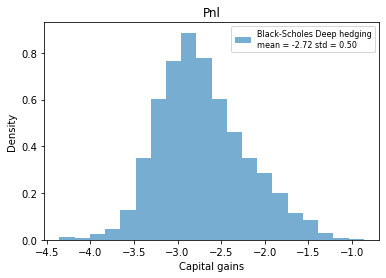

In [57]:
plt.hist(BSDeepHedging_pnl, bins = 20,label = f'Black-Scholes Deep hedging\nmean = {BSDeepHedging_pnl.mean():2.2f} std = {BSDeepHedging_pnl.std():2.2f}',  density = True, alpha = 0.6)

plt.title(f"Pnl")
plt.xlabel("Capital gains")
plt.ylabel("Density")
plt.legend(loc = 1, fontsize = 8)
plt.show()

##### Comparison

In [19]:
print(f'Black-Scholes mean     : {BSpnl.mean():2.5f}, std : {BSpnl.std():2.5f}')
print(f'Deep Hedging  mean     : {BSDeepHedging_pnl.mean():2.5f}, std : {BSDeepHedging_pnl.std():2.5f}')

Black-Scholes mean     : -2.69712, std : 2.06682
Deep Hedging  mean     : -2.71532, std : 0.50489


In [20]:
def entropic_loss_np(pnl, lambda_val = 1, K = s0) -> torch.Tensor:
    return np.mean(np.exp(-lambda_val * pnl/K))/lambda_val

def VaR_loss_np(x, alpha):
    x_sorted = np.sort(x)
    tail_index = int((1 - alpha) * len(x))
    return x_sorted[tail_index]

def CVaR_loss_np(x, alpha):
    CVaR_value = np.mean(x[x < VaR_loss_np(x, alpha)])
    return CVaR_value


print(entropic_loss_np(BSpnl), CVaR_loss_np(BSpnl, 0.95))
print(entropic_loss_np(BSDeepHedging_pnl), CVaR_loss_np(BSDeepHedging_pnl, 0.95))

1.0275591611862183 -7.9644566
1.0275384187698364 -3.6331975


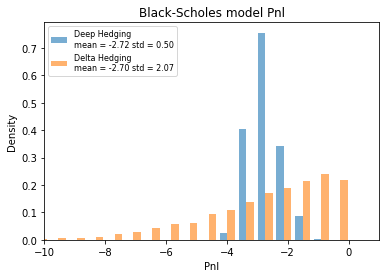

In [22]:
bins=np.histogram(np.hstack((BSDeepHedging_pnl,BSpnl)), bins=20)[1] #get the bin edges

plt.hist([BSDeepHedging_pnl, BSpnl], bins, density = True, alpha = 0.6, 
         label = [f'Deep Hedging\nmean = {BSDeepHedging_pnl.mean():2.2f} std = {BSDeepHedging_pnl.std():2.2f}', f'Delta Hedging\nmean = {BSpnl.mean():2.2f} std = {BSpnl.std():2.2f}'])

plt.title(f"Black-Scholes model Pnl")
plt.xlim(-10, 1)
plt.xlabel("Pnl")
plt.ylabel("Density")
plt.legend(loc = 2, fontsize = 8)
plt.show()


#### Heston model

##### Heston hedging formula


The delta of an call option under Heston model is
\begin{align*}
D &= \frac{\partial C}{\partial S_0} \\
  &= \frac{1}{2} + \frac{1}{\pi} \int_{0}^{\infty} \Re\left[ \frac{e^{-i\phi \ln K} \varphi(X_0,K,v_0,\tau;\phi)}{ i\phi} \right] d\phi
\end{align*}

$
\varphi(X_0,K,v_0,\tau;\phi) = e^{r\phi i\tau}S^{i\phi}\left[ \frac{1 - ge^{d\tau}}{1 - g}\right]^{\frac{-2a}{ \sigma^2}} \exp\left[\frac{\alpha b\tau}{\sigma^2}(\alpha - \rho\sigma\phi i + d)+ \frac{v_0}{\sigma^2}(\alpha - \rho\sigma\phi i + d)\frac{1-e^{d\tau}}{1 - ge^{d\tau}} \right]
$

where
* $ g = \frac{\alpha - \rho\sigma\phi i + d}{\alpha - \rho\sigma\phi i - d}$
* $ d = \sqrt{(\rho\sigma\phi i - \alpha)^2 - \sigma^2(1\phi i - \phi^2)}$



In [23]:
from scipy.integrate import quad

def heston_charfunc(phi, S0, v0, alpha, b, sigma, rho, tau, r):

    # constants
    a = alpha*b
    rspi = rho*sigma*phi*1j
    d = np.sqrt( (rho*sigma*phi*1j - alpha)**2 + (phi*1j+phi**2)*sigma**2 )
    g = (alpha-rspi+d)/(alpha-rspi-d)


    exp1 = np.exp(r*phi*1j*tau)
    term2 = S0**(phi*1j) * ( (1-g*np.exp(d*tau))/(1-g) )**(-2*a/sigma**2)
    exp2 = np.exp(a*tau*(alpha-rspi+d)/sigma**2 + v0*(alpha-rspi+d)*( (1-np.exp(d*tau))/(1-g*np.exp(d*tau)) )/sigma**2)
    return exp1*term2*exp2


def integrand(phi, S0, v0, alpha, b, sigma, rho, tau, r):
    args = (S0, v0, alpha, b, sigma, rho, tau, r)

    numerator = np.exp(-1j*phi*K) * heston_charfunc(phi-1j,*args) - np.exp(-1j*phi*K) * heston_charfunc(phi,*args)

    denominator = 1j*phi
    return numerator/denominator

def heston_delta(S0, K, v0, alpha, b, sigma, rho, tau, r):
    args = (S0, v0, alpha, b, sigma, rho, tau, r)

    P, umax, N = 0, 100, 10000
    dphi = umax / N #dphi is width
    for i in range(1,N):
        # rectangular integration
        phi = dphi * (2*i + 1)/2 # midpoint to calculate height
        numerator = np.exp(-1j*phi*K) * heston_charfunc(phi-1j,*args) - np.exp(-1j*phi*K) * heston_charfunc(phi ,*args)
        denominator = 1j*phi

        P += dphi * numerator/denominator

    return np.real(P/np.pi) + 1/2


In [24]:
def Hestoncompute_modelhedge_pnl( T, dt, sigma, paths, payoff ):

    # Change here to connect signature GAN
    Paths = paths.cpu().detach().numpy()

    hedge = np.zeros_like(Paths[:1]).reshape(-1)
    pnl = 0

    for n in range(Paths.shape[0] - 1):
        S = (Paths[n, :]) / s_0
        K = np.full_like(S, s_0)

        hedge = heston_delta( S, K, v_0, alpha, b, sigma, rho, T - n * dt, mu)

        pnl += hedge * (Paths[n + 1] - Paths[n])
    
    pnl -= payoff(paths).numpy()

    return pnl

Hestonpnl = Hestoncompute_modelhedge_pnl(T = T, dt = dt,sigma = sigma, paths = Hestonpaths, payoff = european_option_payoff)

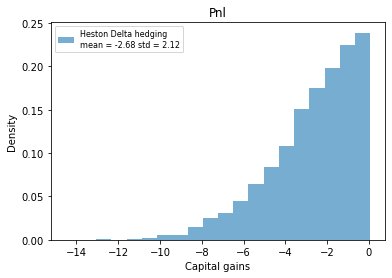

In [60]:
plt.hist(Hestonpnl, bins = 20,label = f'Heston Delta hedging\nmean = {Hestonpnl.mean():2.2f} std = {Hestonpnl.std():2.2f}',  density = True, alpha = 0.6)

plt.title(f"Pnl")
plt.xlabel("Capital gains")
plt.ylabel("Density")
plt.legend(loc = 2, fontsize = 8)
plt.show()

##### Deep Hedging

We use semi-recurrent neural network and set $\delta^\theta_t, V^\theta_t = F^{\theta_t}(I_t, \delta^\theta_{t-1}, V^\theta_{t-1})$.

BSHedging model
* $I_t = (\log(S_{t}), M)$ in time $t$
* Number of input nodes : 5
* Number of output nodes : 2
* Hidden layers : 4
* Node of each hidden layer : 32
* Activation function : relu
* Output layer activation function : tanh

In [27]:
class HestonHedingModel(torch.nn.Module):
    def __init__(self, in_features = 2):
        super().__init__()

        # A four-layer MLP with 32 hidden neurons in each layer
        self.mlp = MultiLayerPerceptron(in_features + 2, 2)

    def forward(self, x, prev):
        hedge, vol = prev
        hedge = hedge.reshape(-1, 1)
        vol = vol.reshape(-1, 1)

        x = torch.cat((x, hedge, vol), 1)
        
        x = self.mlp(x).reshape(-1)
        x = torch.tanh(x)
        hedge =  x[::2]
        vols = x[1::2]

        return hedge, vols

In [28]:
Seed_all()

Hestonmodel = HestonHedingModel().to(DEVICE)
history_ffn = Train(Hestonmodel, False,  1000, Hestonpaths , cost =0,payoff =  european_option_payoff)

HestonDeepHedging_pnl = compute_profit_and_loss(Hestonmodel, False, T, dt, sigma, Hestonpaths, cost = 0, payoff = european_option_payoff).cpu().detach().numpy()

  0%|          | 0/1000 [00:00<?, ?it/s]

Loss=0.03759: 100%|██████████| 1000/1000 [03:39<00:00,  4.55it/s]


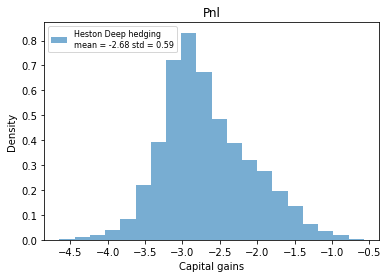

In [61]:
plt.hist(HestonDeepHedging_pnl, bins = 20,label = f'Heston Deep hedging\nmean = {HestonDeepHedging_pnl.mean():2.2f} std = {HestonDeepHedging_pnl.std():2.2f}',  density = True, alpha = 0.6)

plt.title(f"Pnl")
plt.xlabel("Capital gains")
plt.ylabel("Density")
plt.legend(loc = 2, fontsize = 8)
plt.show()

##### Comparison

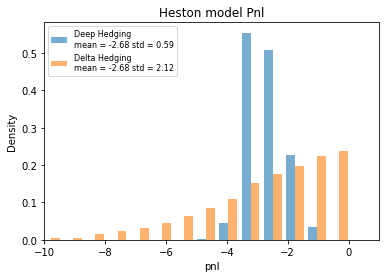

In [32]:
bins=np.histogram(np.hstack((HestonDeepHedging_pnl, Hestonpnl)), bins=20)[1] #get the bin edges

plt.hist([HestonDeepHedging_pnl ,Hestonpnl], bins, density = True, alpha = 0.6, 
         label = [f'Deep Hedging\nmean = {HestonDeepHedging_pnl.mean():2.2f} std = {HestonDeepHedging_pnl.std():2.2f}',
                  f'Delta Hedging\nmean = {Hestonpnl.mean():2.2f} std = {Hestonpnl.std():2.2f}'])

plt.title(f"Heston model Pnl")
plt.xlabel("pnl")
plt.ylabel("Density")
plt.legend(loc = 2, fontsize = 8)
plt.xlim(-10, 1)
plt.show()


#### Cost

This part compare how different transaction cost will influence premium of an european call option.

$p_0$ means the premium under no transaction cost, and $p_\epsilon$ means the premium under transaction cost $\epsilon$, where $\epsilon$ is $2^{-i}, i = 6, 7, 8, 9$


In [ ]:
costs = np.array([2 ** -6, 2 ** -7, 2 ** -8, 2 ** -9])

Seed_all()
BSmodel_nocost = BSHedingModel().to(DEVICE)
history_ffn = Train(BSmodel_nocost, True, 1000, BSpaths, cost = 0, payoff = european_option_payoff)
BSDeepHedging_pnl_0 = compute_profit_and_loss(BSmodel_nocost, True, T, dt, sigma, BSpaths, cost = 0, payoff =  european_option_payoff).cpu().detach().numpy()

Seed_all()
BSmodel_cost0 = BSHedingModel().to(DEVICE)
history_ffn = Train(BSmodel_cost0, True, 1000, BSpaths, cost = costs[0], payoff = european_option_payoff)
BSDeepHedging_pnl_cost0 = compute_profit_and_loss(BSmodel_cost0, True, T, dt, sigma, BSpaths, cost = costs[0], payoff =  european_option_payoff).cpu().detach().numpy()

Seed_all()
BSmodel_cost1 = BSHedingModel().to(DEVICE)
history_ffn = Train(BSmodel_cost1, True,  1000, BSpaths, cost = costs[1], payoff = european_option_payoff)
BSDeepHedging_pnl_cost1 = compute_profit_and_loss(BSmodel_cost1, True, T, dt, sigma, BSpaths, cost = costs[1], payoff =  european_option_payoff).cpu().detach().numpy()

Seed_all()
BSmodel_cost2 = BSHedingModel().to(DEVICE)
history_ffn = Train(BSmodel_cost2, True,  1000, BSpaths, cost = costs[2], payoff = european_option_payoff)
BSDeepHedging_pnl_cost2 = compute_profit_and_loss(BSmodel_cost2, True, T, dt, sigma, BSpaths, cost = costs[2], payoff =  european_option_payoff).cpu().detach().numpy()

Seed_all()
BSmodel_cost3 = BSHedingModel().to(DEVICE)
history_ffn = Train(BSmodel_cost3, True,  1000, BSpaths, cost = costs[3], payoff = european_option_payoff)
BSDeepHedging_pnl_cost3 = compute_profit_and_loss(BSmodel_cost3, True, T, dt, sigma, BSpaths, cost = costs[3], payoff =  european_option_payoff).cpu().detach().numpy()


Loss=0.04100: 100%|██████████| 1000/1000 [03:30<00:00,  4.75it/s]


In [34]:
def VaR(x, alpha):
    x_sorted = np.sort(x)
    tail_index = int((1 - alpha) * len(x))
    return x_sorted[tail_index]

def CVaR(x, alpha):
    CVaR_value = np.mean(x[x < VaR(x, alpha)])
    return CVaR_value


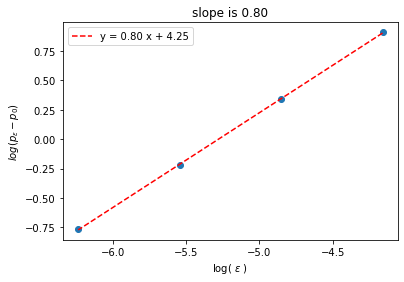

In [62]:
cost_none = CVaR( BSDeepHedging_pnl, 0.95)
cost_0 = CVaR( BSDeepHedging_pnl_cost0, 0.95)
cost_1 = CVaR( BSDeepHedging_pnl_cost1, 0.95)
cost_2 = CVaR( BSDeepHedging_pnl_cost2, 0.95)
cost_3 = CVaR( BSDeepHedging_pnl_cost3, 0.95)


p = np.array([np.mean(cost_0 - cost_none),
              np.mean(cost_1 - cost_none),
              np.mean(cost_2 - cost_none),
              np.mean(cost_3 - cost_none)])

y = np.log(np.abs(p))
x_cost = np.log(costs)

z = np.polyfit(x_cost, y, 1)
p = np.poly1d(z)

plt.plot(x_cost, p(x_cost),"r--", label = (f"y = {z[0]:2.2f} x + {z[1]:2.2f}") )
plt.scatter(x_cost, y)
plt.title(f"slope is {z[0]:2.2f}")
plt.xlabel(r"log( $\epsilon$ )")
plt.ylabel(r"$ log(p_\epsilon- p_0)$ ")
plt.legend()
plt.show()
